In [2]:
# Unclutter the display.
import geopandas as gpd
import geoplot as gplt
# import geoplot.crs as gcrs
import pandas as pd
import matplotlib.pyplot as plt

location_key = 'id'

elec_data = pd.read_csv('../data/election_data/ward votes sample.csv')

map_data = gpd.read_file('../data/nepal_map_data/nepal-wards.topojson')

# filter out null and irrelevant values
# nepal_data = eqs_data.query("place.str.contains('Nepal') & mag > 3", engine='python')
# # nepal_map_data = map_data[map_data[location_key].notnull()]

# # filter out reserves and other non administrative divisions
# irrelevant_gns = ['National Park', 'Wildlife Reserve','Hunting Reserve', 'Watershed and Wildlife Reserve', 'Development Area']
# nepal_map_data = map_data.query('Type_GN.str.contains("palika")',engine='python')
# not_nepal_map_data = map_data.query('~Type_GN.str.contains("palika")',engine='python')

# nepal_map_data = map_data.dissolve(by='Province')

In [3]:
wards_data_ktm = map_data.query('PALIKA.str.contains("Kathmandu")', engine='python')
# elec_data["Total Counted portion"] = elec_data["Suman Sayami"]/elec_data["Total counted"]*100
wards_data_ktm = wards_data_ktm.merge(elec_data, how='inner', left_on=["WARD"], right_on=["Ward"]).iloc[:,1:]
wards_data_ktm[:2]

,PROVINCE,DISTRICT,PALIKA,TYPE,WARD,geometry,Ward,Area,Total Votes,Balendra Shah,...,Votes Counted,Votes Counted Proportion,Shah Proportion,Singh Proportion,Sthapit Proportion,Sayami Proportion,Shah %,Singh %,Sthapit %,Sayami %
0,3,KATHMANDU,Kathmandu,Mahanagarpalika,1,"POLYGON ((85.33272 27.71672, 85.33262 27.71641...",1,Naxal,2318,783,...,2318,1.0,0.337791,0.194996,0.157463,0.090595,33.779120,19.499569,15.746333,9.059534
1,3,KATHMANDU,Kathmandu,Mahanagarpalika,10,"POLYGON ((85.34256 27.70121, 85.34249 27.70102...",10,Baneshowr,7090,2728,...,7090,1.0,0.384767,0.253456,0.157546,0.009027,38.476728,25.345557,15.754584,0.902680


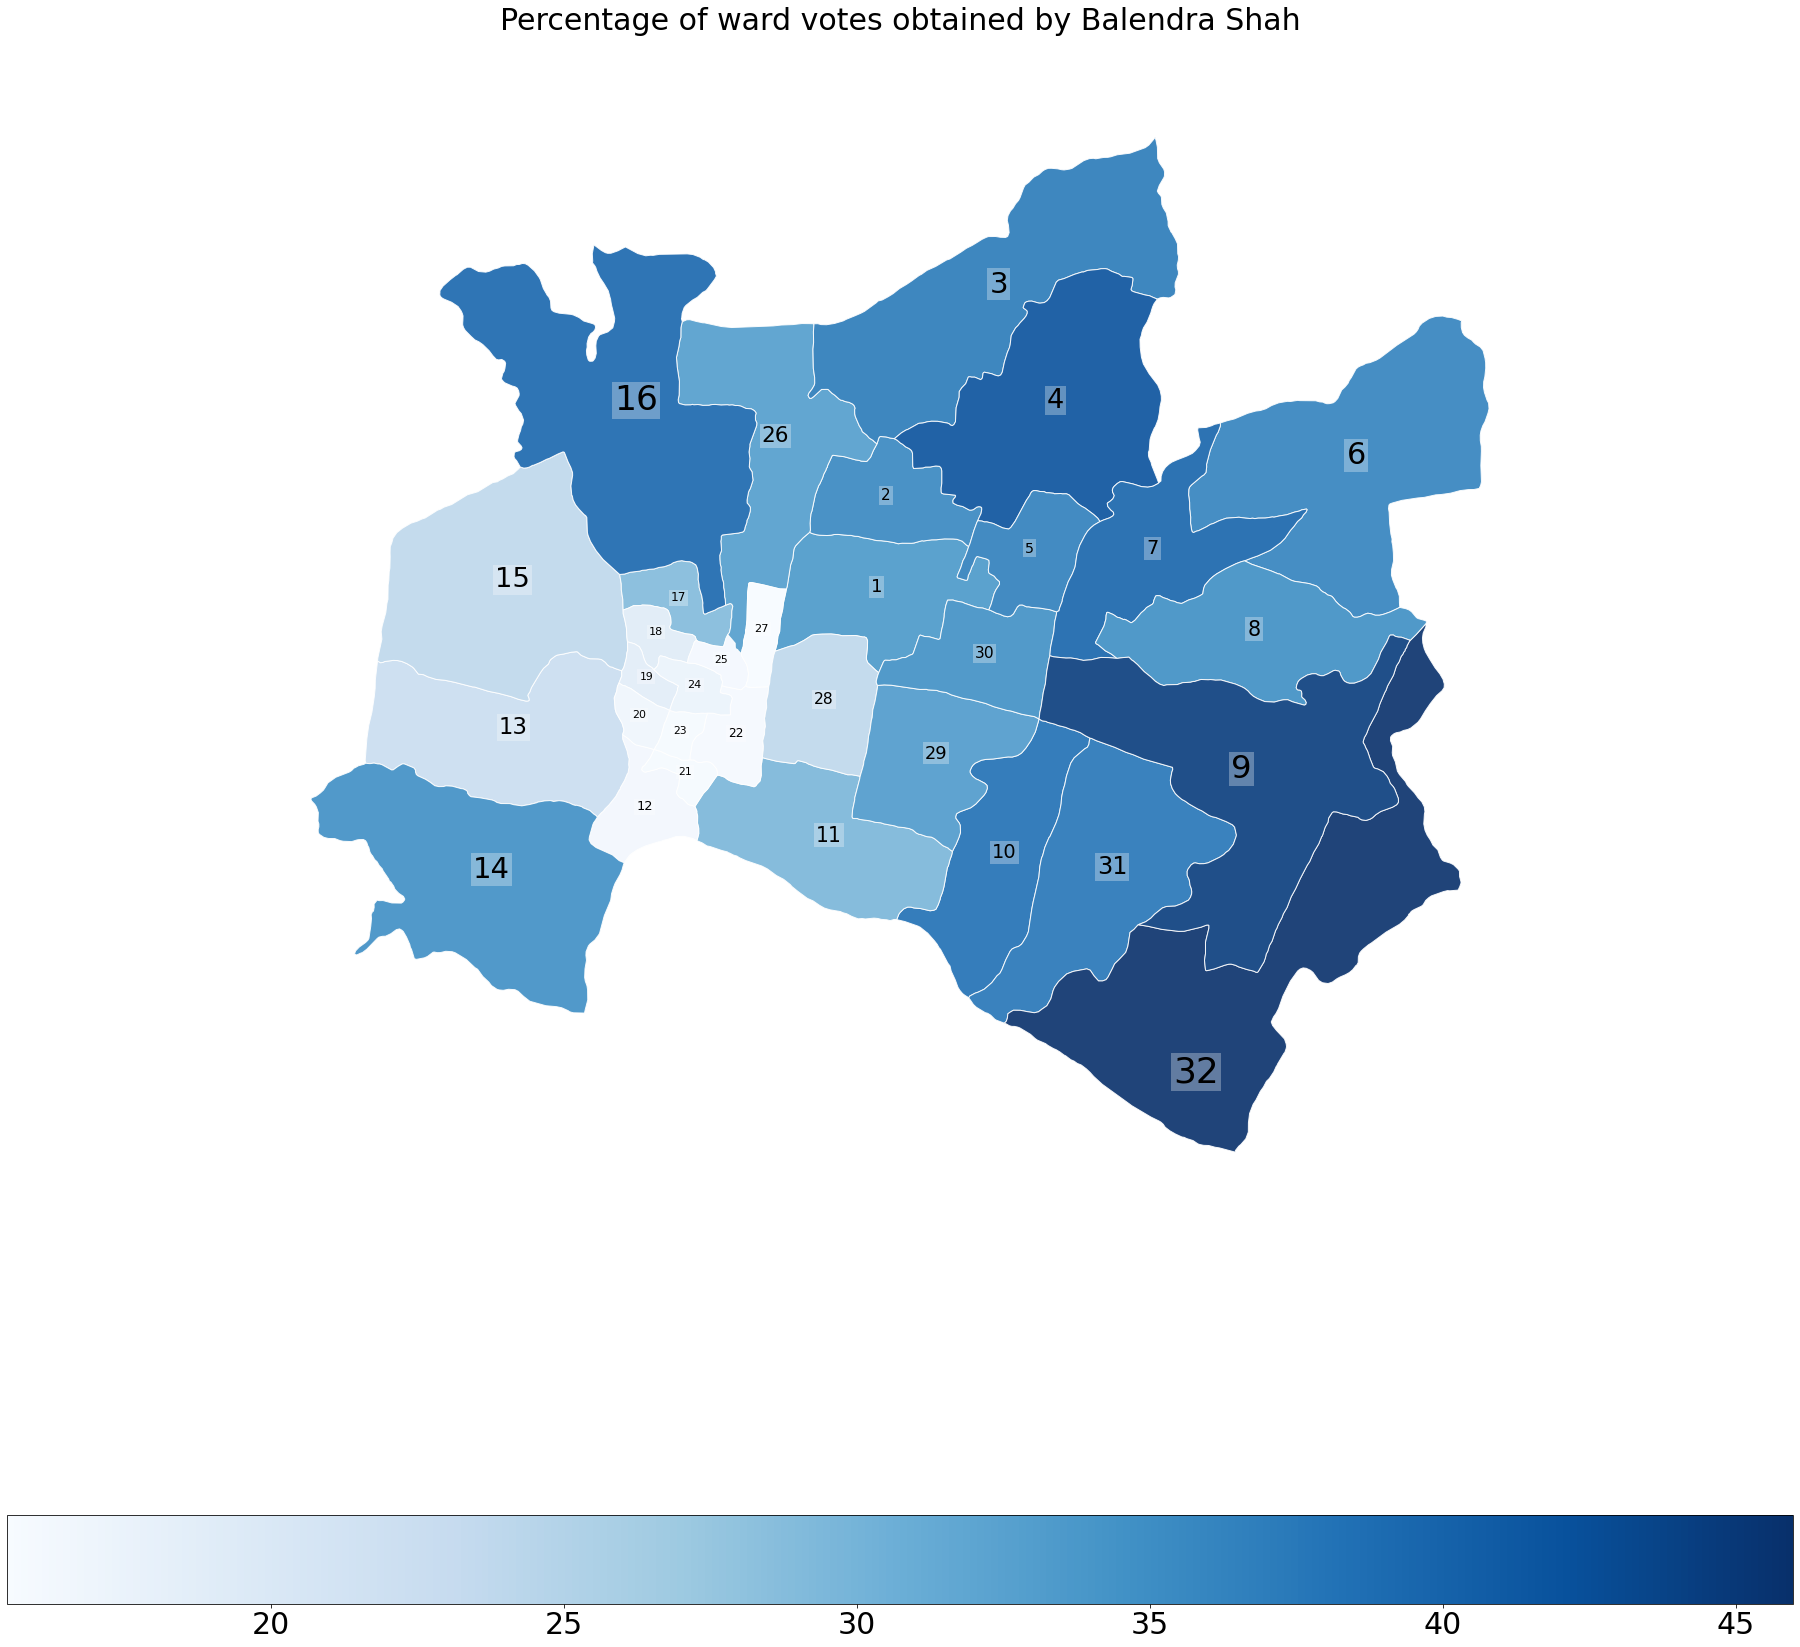

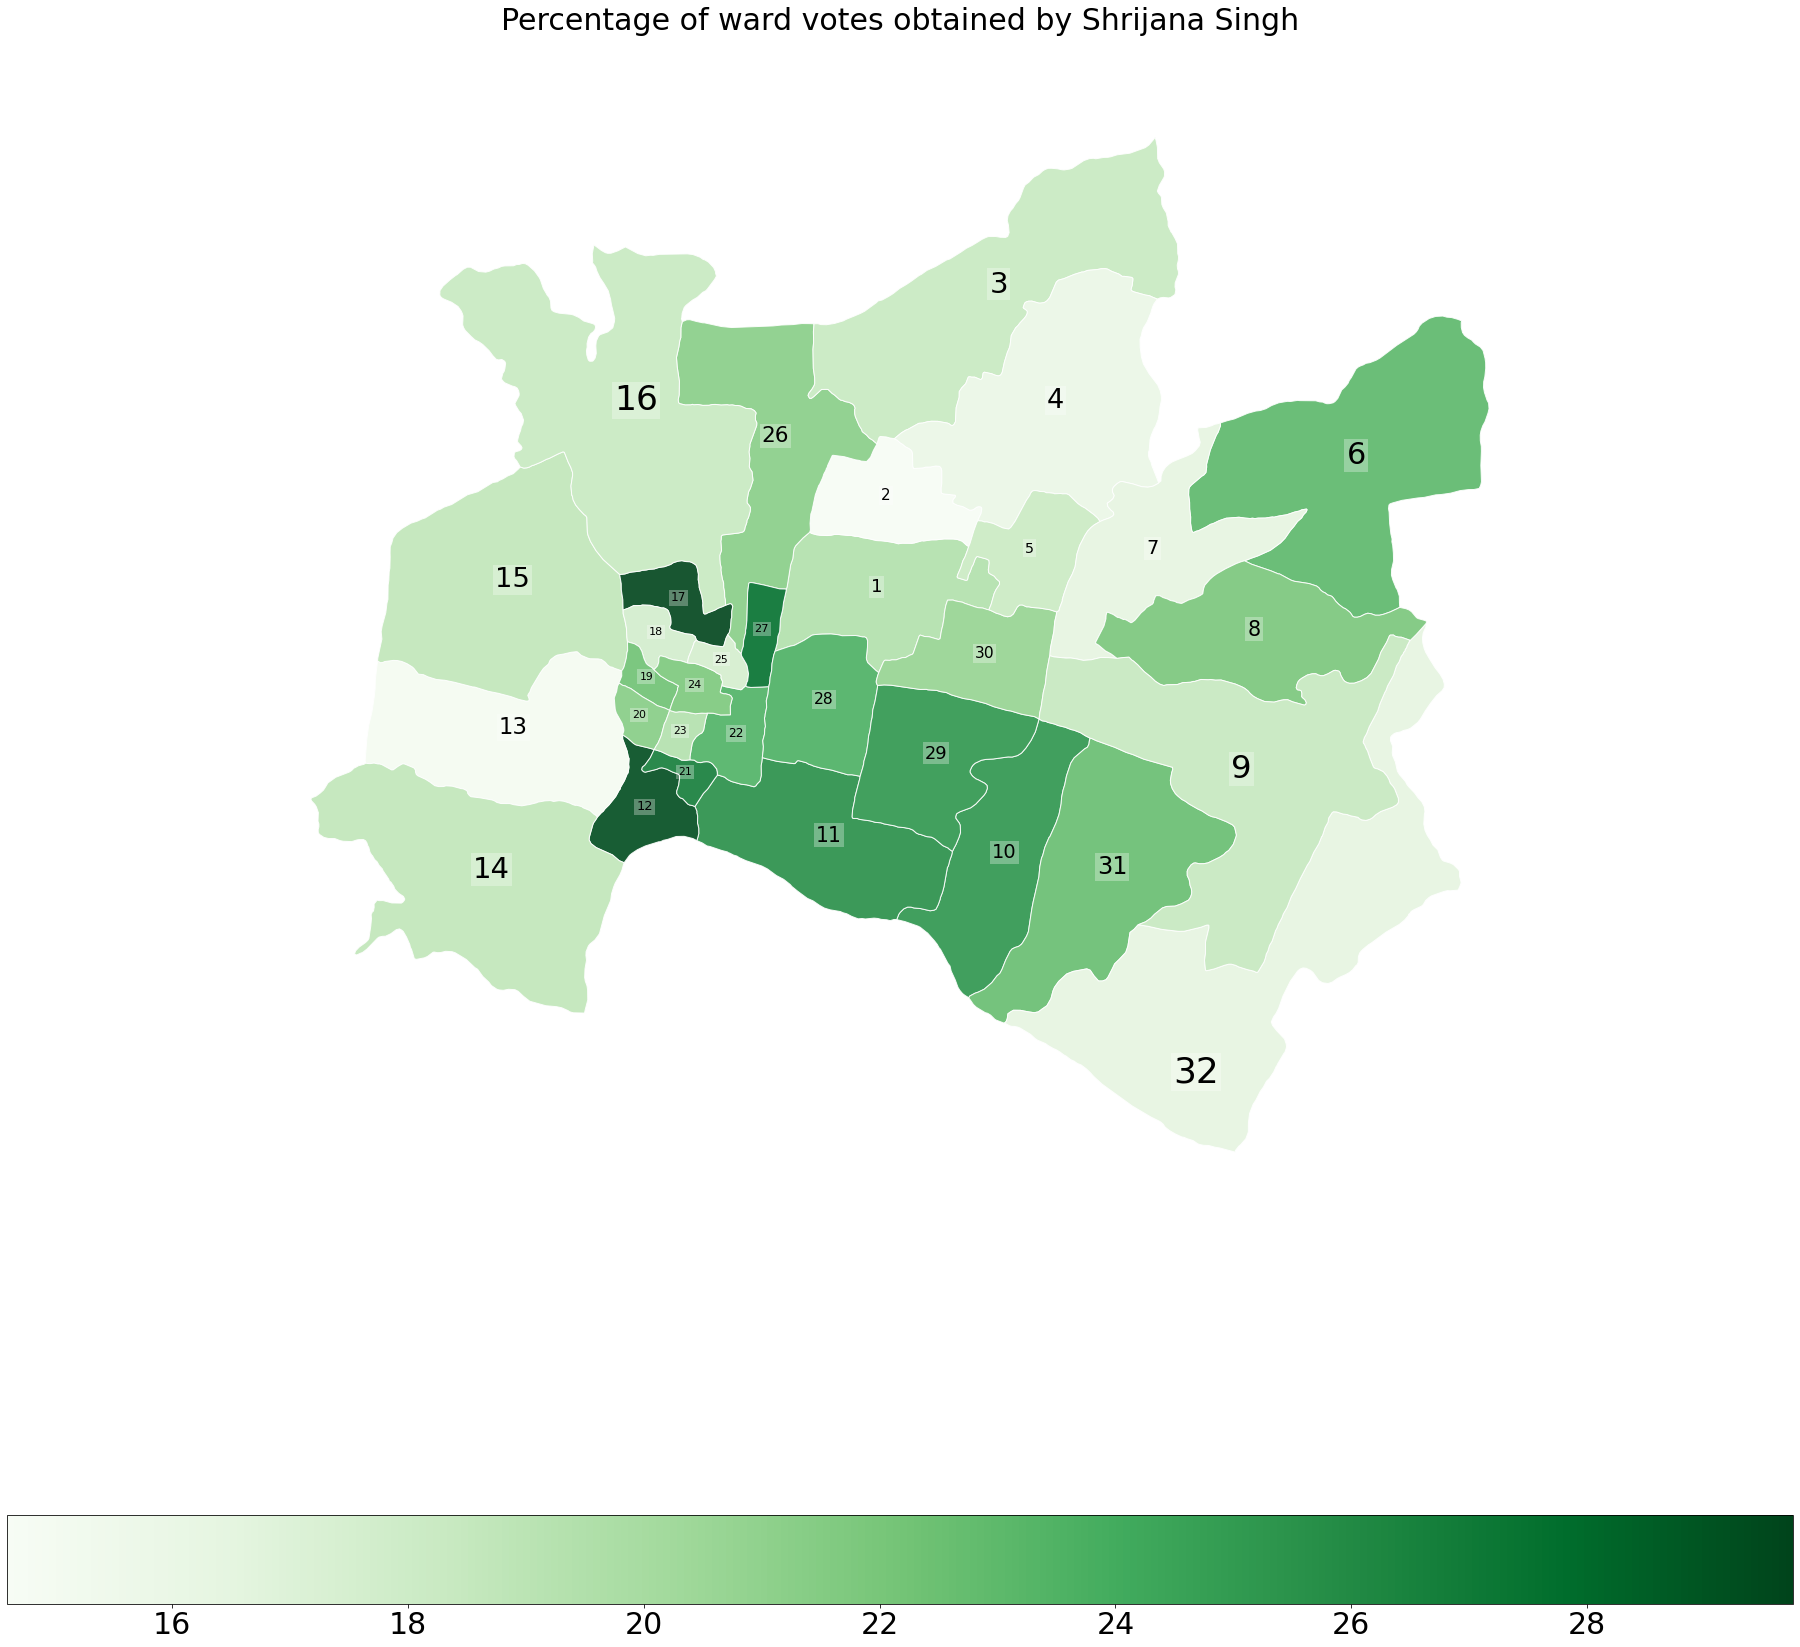

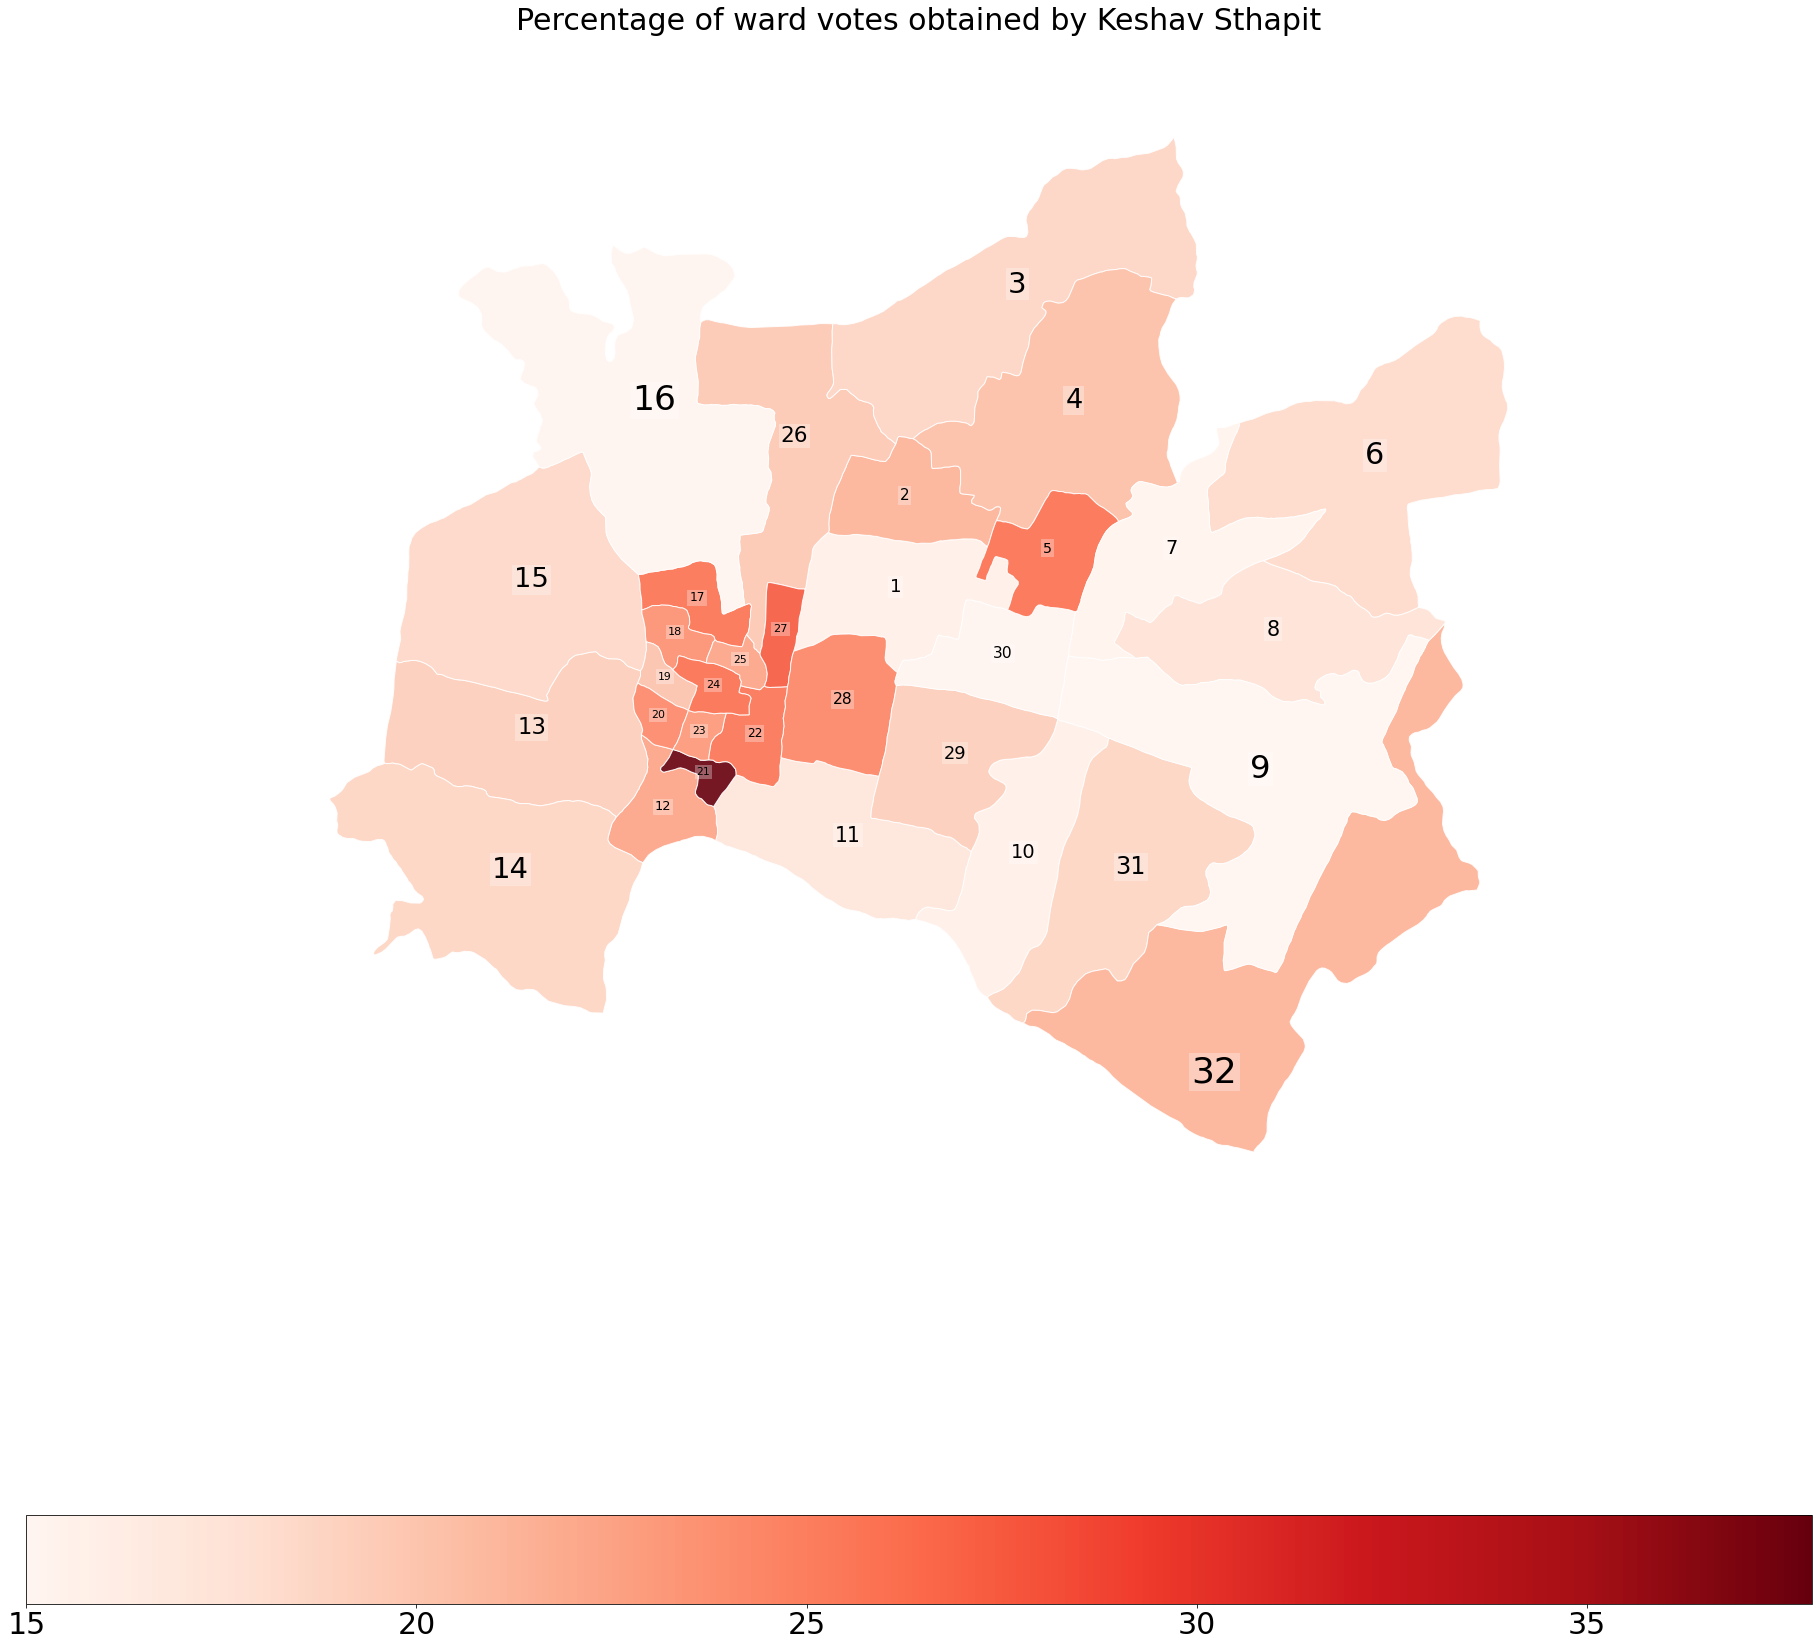

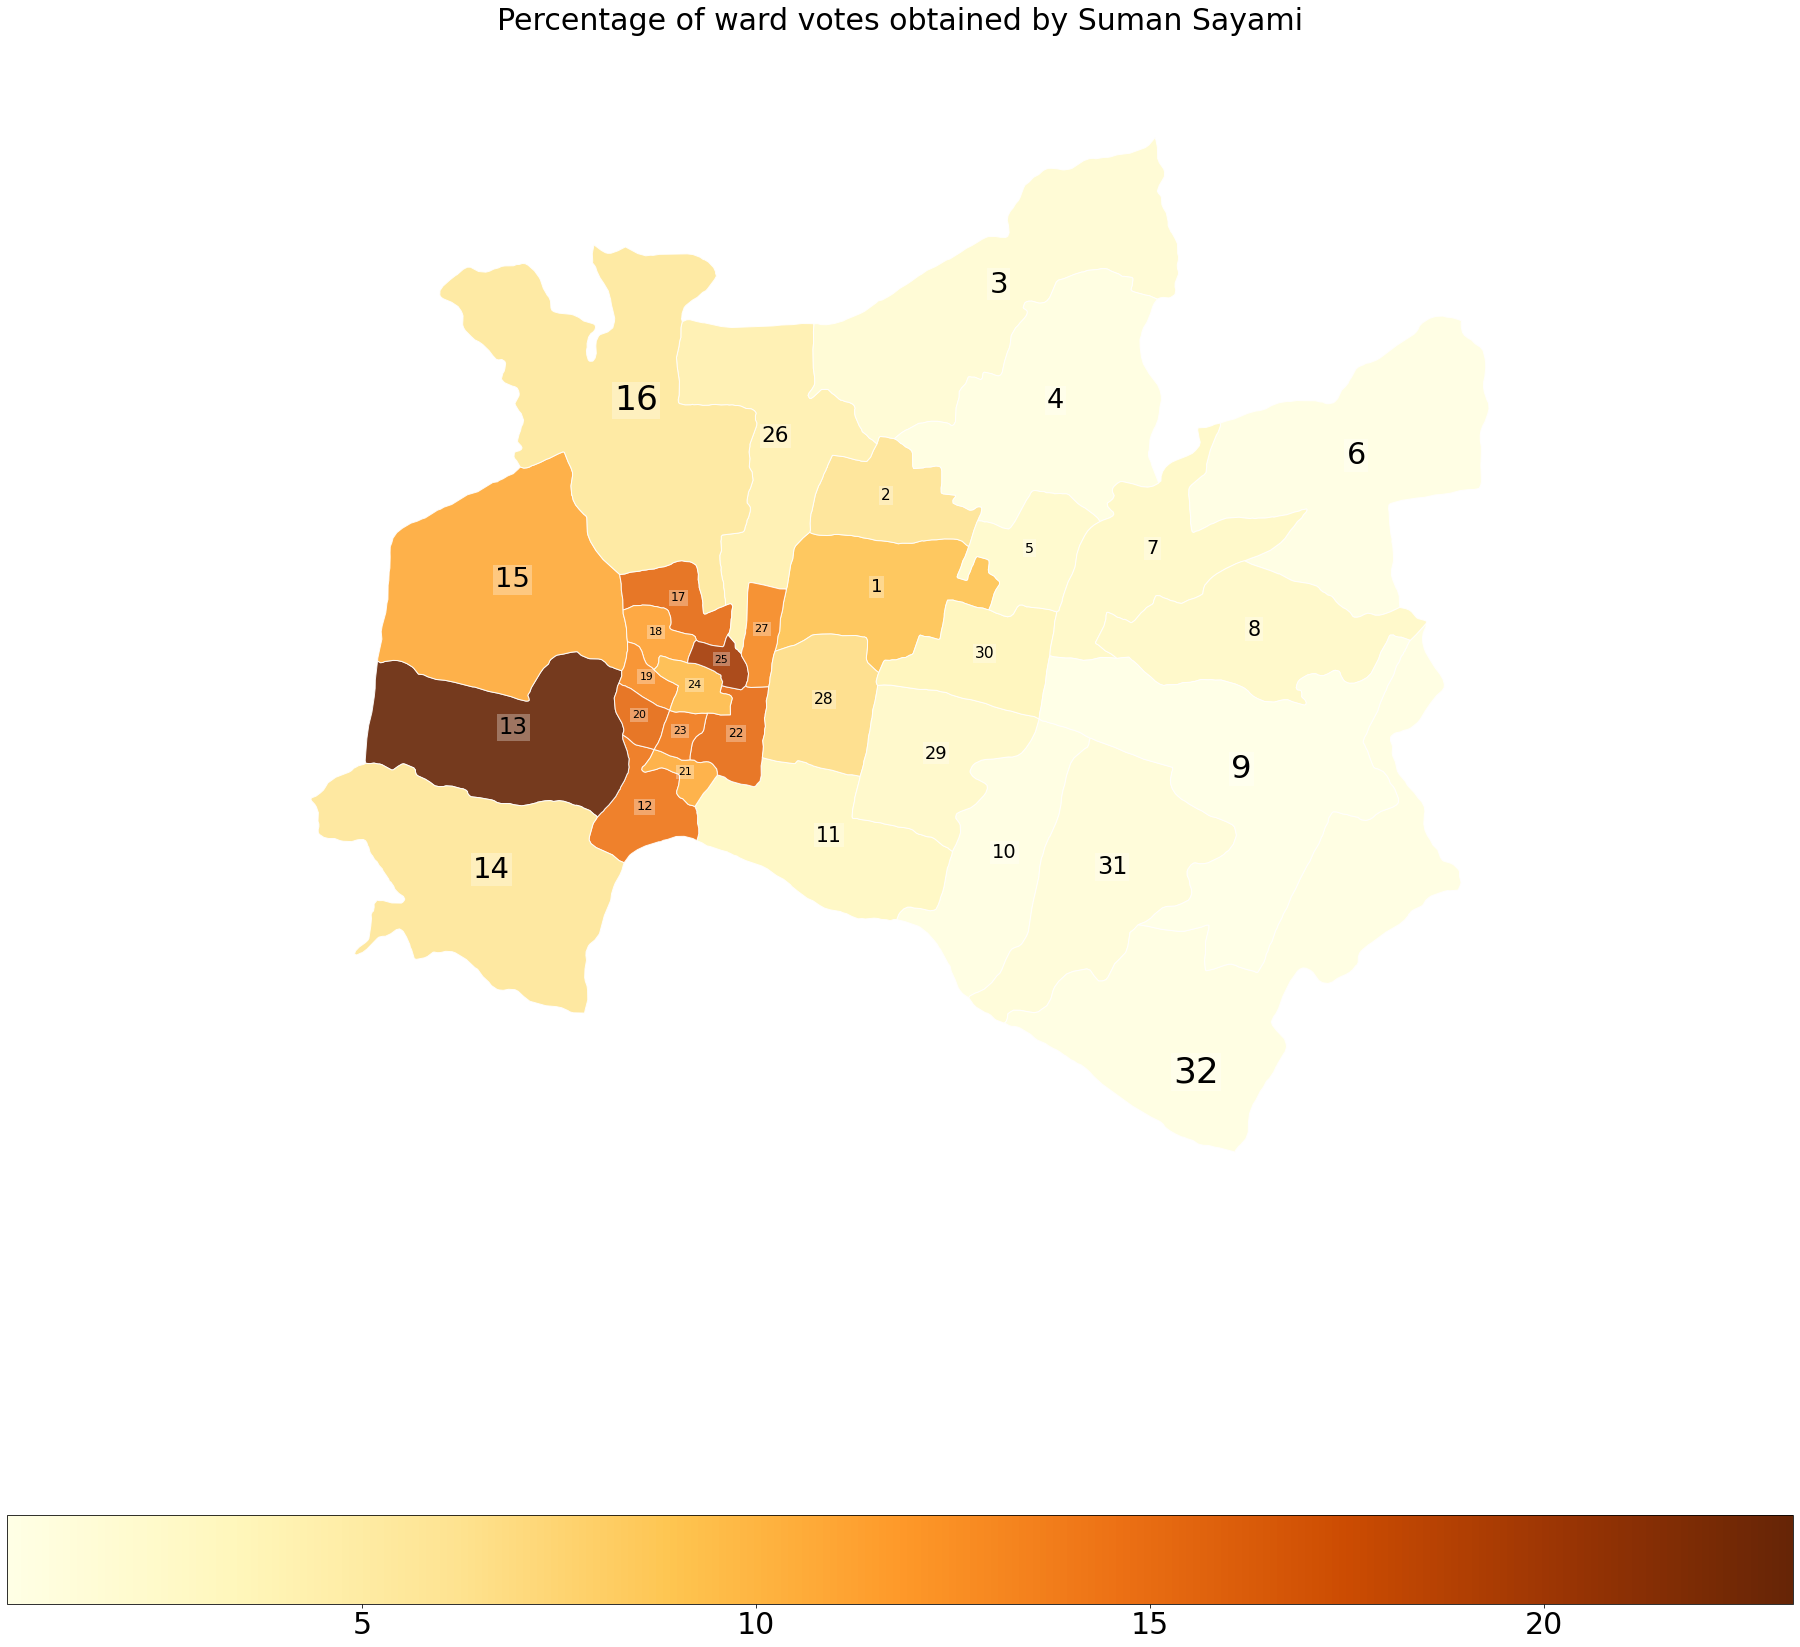

In [4]:
candidates = [('Balendra Shah', 'Blues'),('Shrijana Singh','Greens'),('Keshav Sthapit','Reds'),('Suman Sayami', 'YlOrBr')]

# proportion maps
for (candidate, pallete) in candidates:
    field = candidate.split()[1] + " %"
    axis = gplt.choropleth(
        wards_data_ktm, 
        hue=field,
        # scale = 'Area',
        alpha = 0.9, 
        cmap=pallete,
        legend=True,
        edgecolor='white',
        figsize=(32,32),
        legend_kwargs={'orientation': 'horizontal'},
        )
    
    # changing the legend font size
    legend_axis = axis.figure.axes[1]
    legend_axis.tick_params(labelsize=30)

    for geometry, label, name in zip(wards_data_ktm.geometry, wards_data_ktm.WARD, wards_data_ktm.Area):
        xycoords = (geometry.centroid.coords[0][0]-0.0006,geometry.centroid.coords[0][1]) if label != 32 else (geometry.centroid.coords[0][0]-0.0064,geometry.centroid.coords[0][1]-0.01)
        axis.annotate(
            text=label, 
            xy=xycoords, 
            ha='left',
            fontstretch='ultra-expanded', 
            fontsize = 10+ 0.7*(geometry.area / wards_data_ktm.geometry.area.min()), 
            bbox={'facecolor': 'white', 'alpha':0.3, 'pad': 2, 'edgecolor':'none'},
            label=name
            )
        plt.title("Percentage of ward votes obtained by "+candidate, fontsize=30)
    plt.savefig('../visualizations/'+candidate + " Proportion of votes in Kathmandu.svg")
        
        


In [5]:
# # proportion maps
# for candidate in candidates:
#     field = candidate.split()[1] + " Proportion"
#     axis = gplt.choropleth(
#         wards_data_ktm, 
#         hue=field,
#         alpha = 0.85, 
#         cmap='BuGn',
#         legend=True,
#         edgecolor='white',
#         figsize=(30,30)
#         )
    
#     # changing the legend font size
#     legend_axis = axis.figure.axes[1]
#     legend_axis.tick_params(labelsize=30)

#     for geometry, label in zip(wards_data_ktm.geometry, wards_data_ktm.WARD):
#         xycoords = (geometry.centroid.coords[0][0]-0.0006,geometry.centroid.coords[0][1]) if label != 32 else (geometry.centroid.coords[0][0]-0.0064,geometry.centroid.coords[0][1]-0.01)
#         axis.annotate(
#             text=label, 
#             xy=xycoords, 
#             ha='left',
#             fontstretch='ultra-expanded', 
#             fontsize = 10+ ( geometry.area / wards_data_ktm.geometry.area.min()), 
#             bbox={'facecolor': 'white', 'alpha':0.3, 'pad': 2, 'edgecolor':'none'}
#             )
#         plt.title("Proportion of ward votes obtained by "+ candidate, fontsize=30)
#     plt.savefig('../visualizations/'+candidate + " Proportion of votes in Kathmandu.svg")

In [6]:
wards_data_ktm['winner'] = wards_data_ktm[[candidate[0] for candidate in candidates]].idxmax(axis=1)
wards_data_ktm[:2]

,PROVINCE,DISTRICT,PALIKA,TYPE,WARD,geometry,Ward,Area,Total Votes,Balendra Shah,...,Votes Counted Proportion,Shah Proportion,Singh Proportion,Sthapit Proportion,Sayami Proportion,Shah %,Singh %,Sthapit %,Sayami %,winner
0,3,KATHMANDU,Kathmandu,Mahanagarpalika,1,"POLYGON ((85.33272 27.71672, 85.33262 27.71641...",1,Naxal,2318,783,...,1.0,0.337791,0.194996,0.157463,0.090595,33.779120,19.499569,15.746333,9.059534,Balendra Shah
1,3,KATHMANDU,Kathmandu,Mahanagarpalika,10,"POLYGON ((85.34256 27.70121, 85.34249 27.70102...",10,Baneshowr,7090,2728,...,1.0,0.384767,0.253456,0.157546,0.009027,38.476728,25.345557,15.754584,0.902680,Balendra Shah


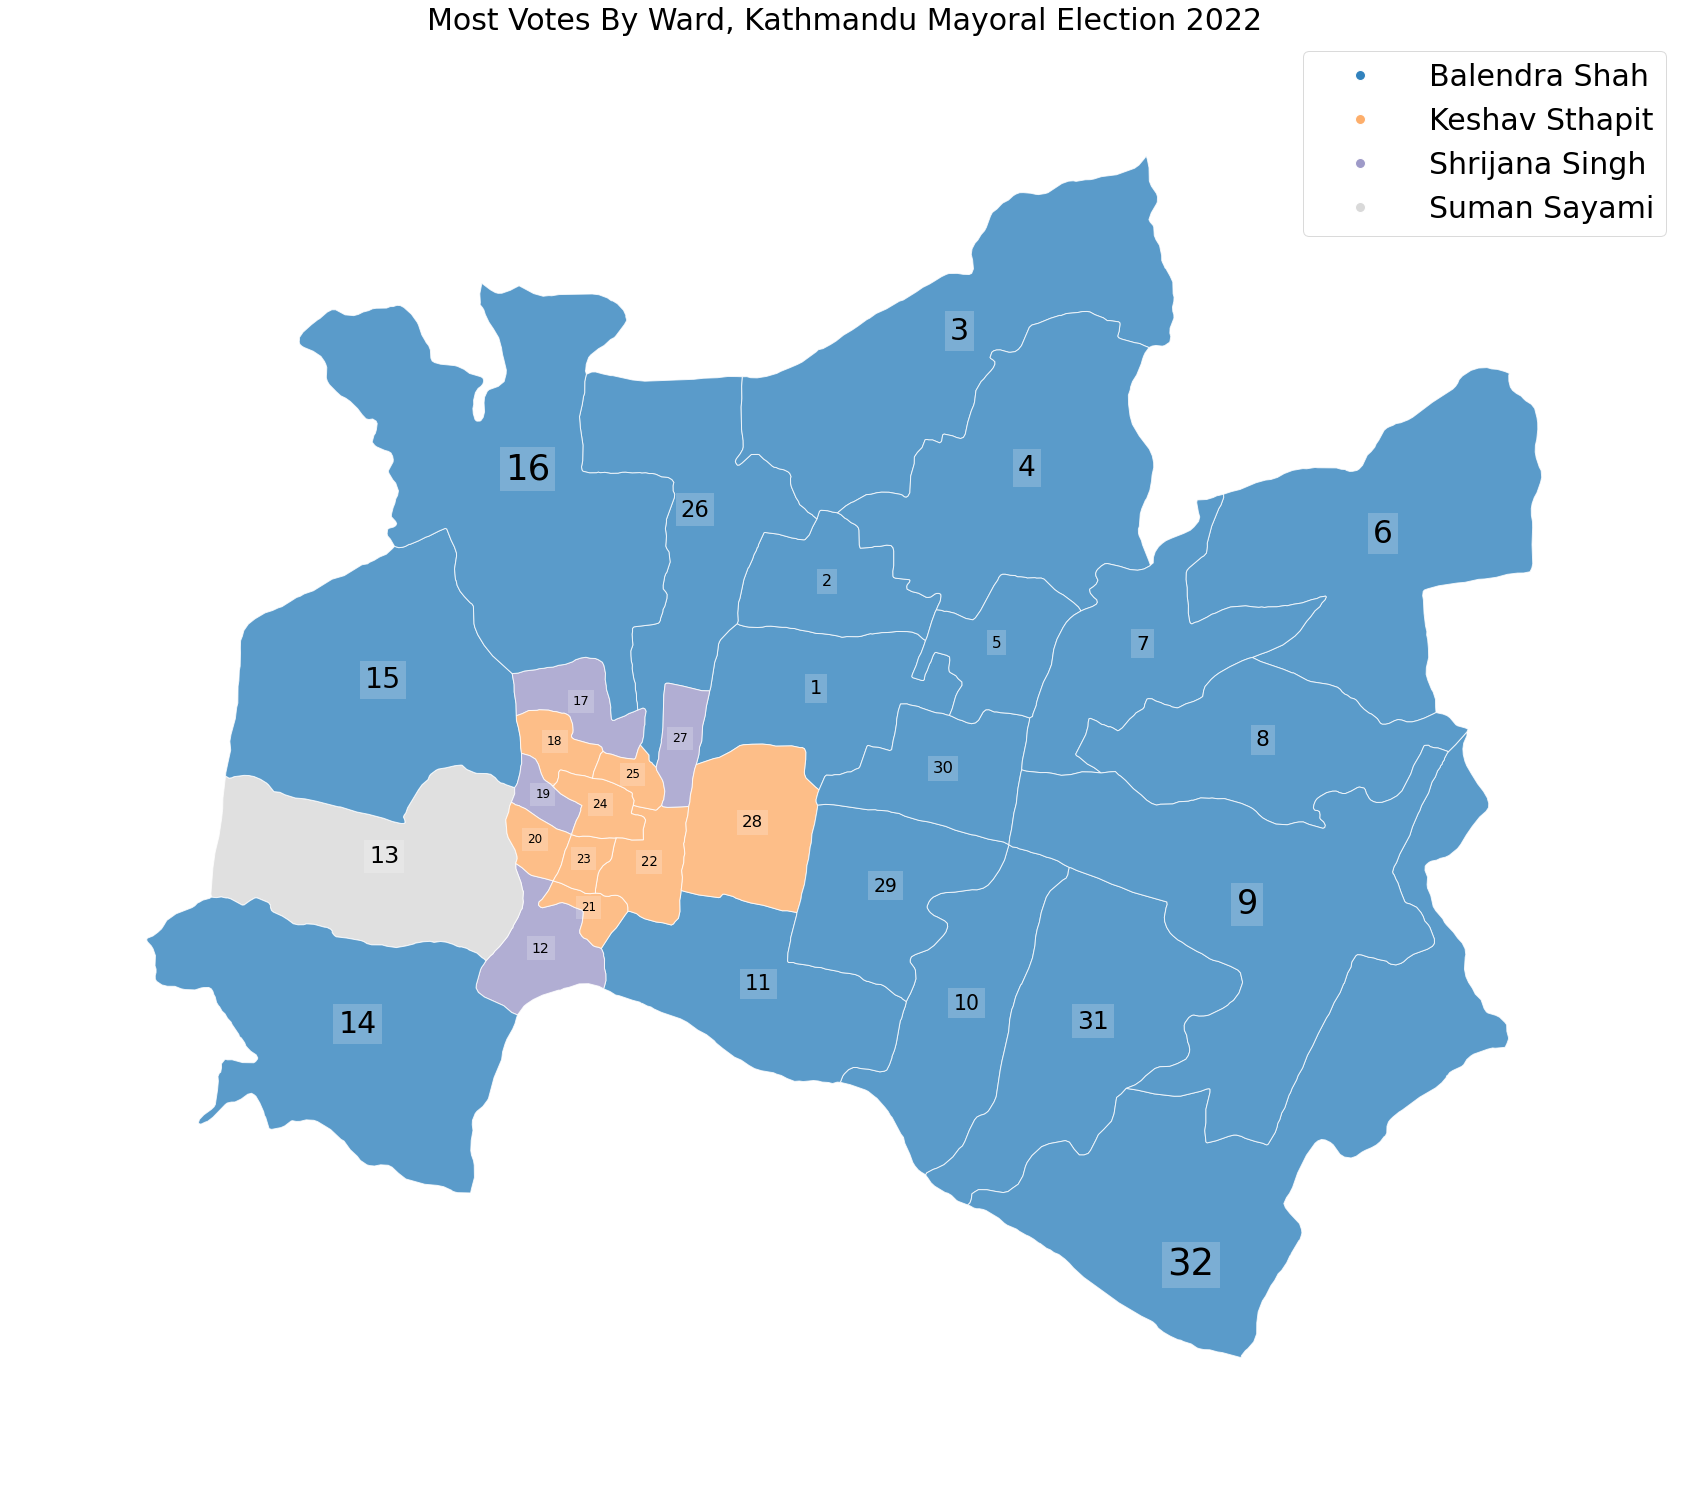

In [7]:
field = 'winner'



axis = gplt.choropleth(
    wards_data_ktm, 
    hue=field,
    cmap='tab20c',
    alpha = 0.8, 
    legend=True,
        legend_kwargs={
            'fontsize':'30',
            'fancybox':'True',
            'framealpha':0.7, 
            'handlelength':3,
            # 'markerscale':3,
            # 'frameon':True,
            
        },
    edgecolor='white',
    figsize=(30,30)
    )


for geometry, label in zip(wards_data_ktm.geometry, wards_data_ktm.WARD):
    xycoords = (geometry.centroid.coords[0][0]-0.0006,geometry.centroid.coords[0][1]) if label != 32 else (geometry.centroid.coords[0][0]-0.0064,geometry.centroid.coords[0][1]-0.01)
    axis.annotate(
        text=label, 
        xy=xycoords,
        ha='left',
        fontstretch='ultra-expanded', 
        fontsize = 11+0.7*(geometry.area / wards_data_ktm.geometry.area.min()), 
        bbox={'facecolor': 'white', 'alpha':0.2, 'pad': 5, 'edgecolor':'none'}
        )
    plt.title("Most Votes By Ward, Kathmandu Mayoral Election 2022", fontsize=30)
plt.savefig('../visualizations/most votes Kathmandu.svg')

In [13]:
wards_data_ktm.explore(
    column='Sthapit %',
    tooltip=['Area', 'Sthapit %', 'Keshav Sthapit' ,'winner'],
    popup=True,
    legend=True,
    tiles="CartoDB positron",
    cmap='Reds',
    style_kwds=dict(color="white")
)